<center> Assignment 04 </center>

<center> 陈禹凡 12232261 </center>

In [1]:
import numpy as np
import pandas as pd
import datetime
import netCDF4
import xarray as xr
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.ticker as mticker
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

## 1. Global Earthquakes

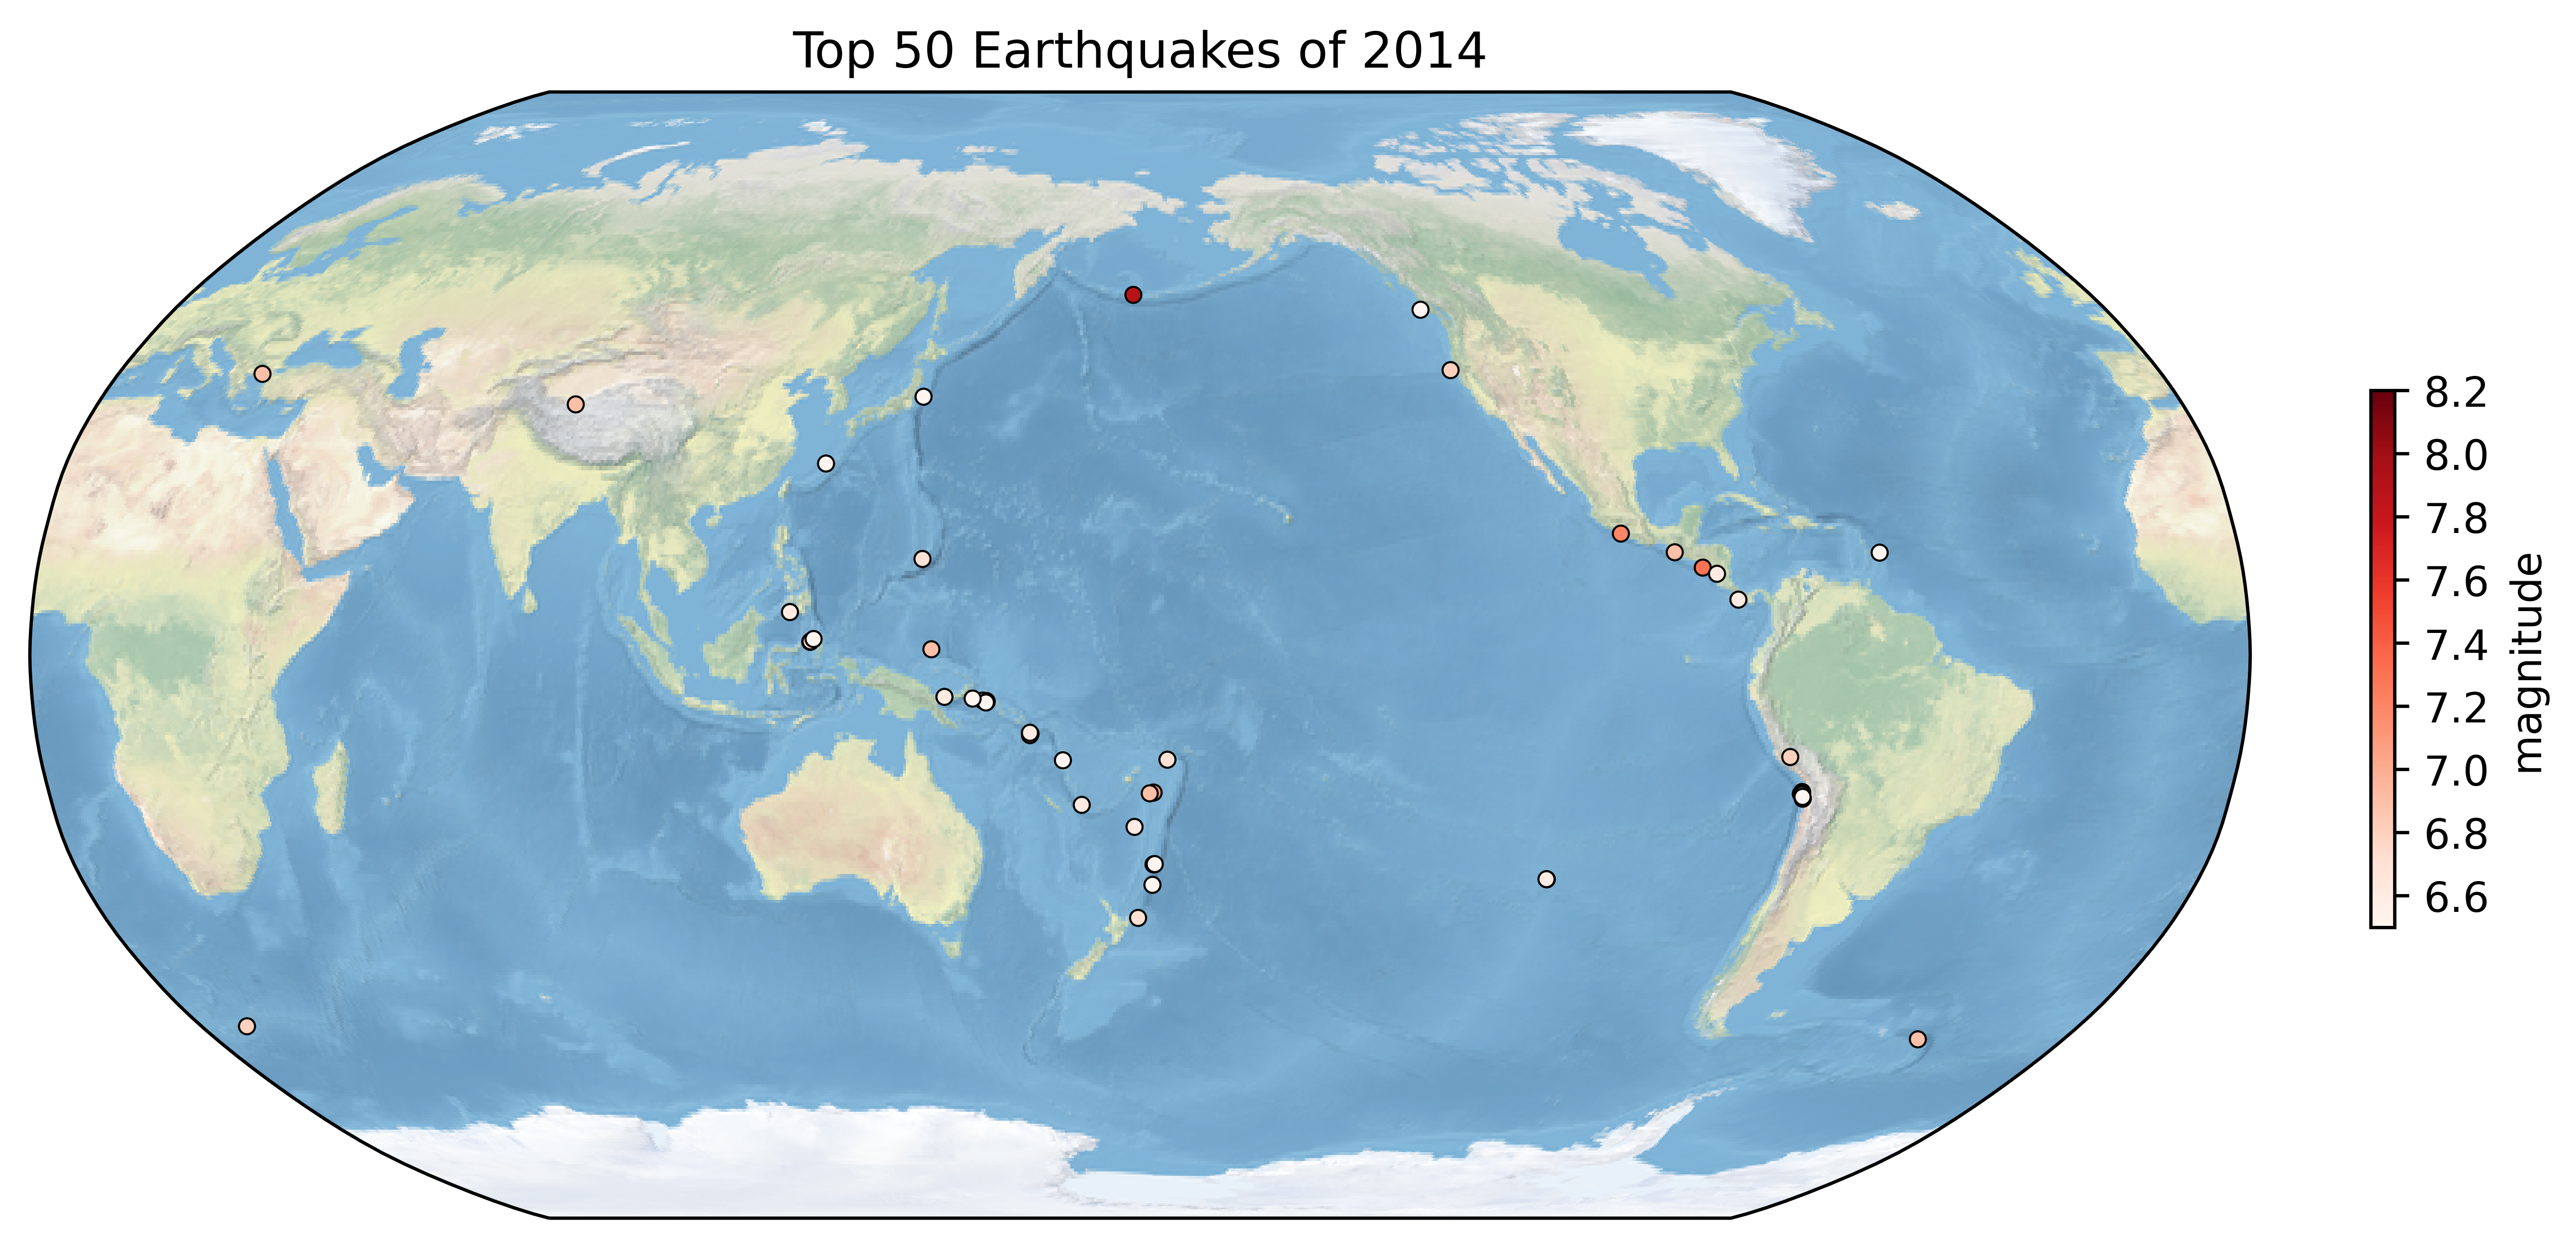

In [2]:
#读取文件
df_earth = pd.read_csv("usgs_earthquakes.csv")

#挑选出mag前50的数据，并将其经纬度、mag赋值
lon=df_earth.sort_values("mag",ascending=False).head(50)['longitude'].values
lat=df_earth.sort_values("mag",ascending=False).head(50)['latitude'].values
mag=df_earth.sort_values("mag",ascending=False).head(50)['mag'].values

fig = plt.figure(figsize=(10, 5),dpi=600)

#使用Robinson投影，中心经度为180
ax = fig.add_subplot(projection=ccrs.Robinson(central_longitude=180))

#将mag前50的地点，绘制在PlateCarree投影中，并进行修饰
ax.scatter(lon,lat,c=mag ,transform=ccrs.PlateCarree(),
           marker='o',s=15,edgecolors='k',linewidths=0.5,cmap='Reds')

#尽可能缩小地图
ax.set_global()

#将低分辨率的自然地球背景图像添加到轴
ax.stock_img()

#标题
ax.set_title('Top 50 Earthquakes of 2014')

#colorbar位置的设定
pos = ax.get_position()#获取图片位置（pos.ymax=0.88，pos.ymin=0.125）

#四个参数分别是colorbar的左、下、宽、长
cax = fig.add_axes([0.925, 0.32, 0.008, 0.36])

#colorbar具体参数
cbar = mpl.colorbar.ColorbarBase(cax,cmap='Reds',#颜色
                                 norm=mpl.colors.Normalize(6.5,8.2),#设置颜色条最大最小值
                                 ticks=list(np.linspace(6.6, 8.2, 9)),#自定义各段的记号
                                 orientation='vertical')#方向垂直
cbar.ax.set_ylabel('magnitude')

plt.show()

## 2. Explore a netCDF dataset

### 2.1

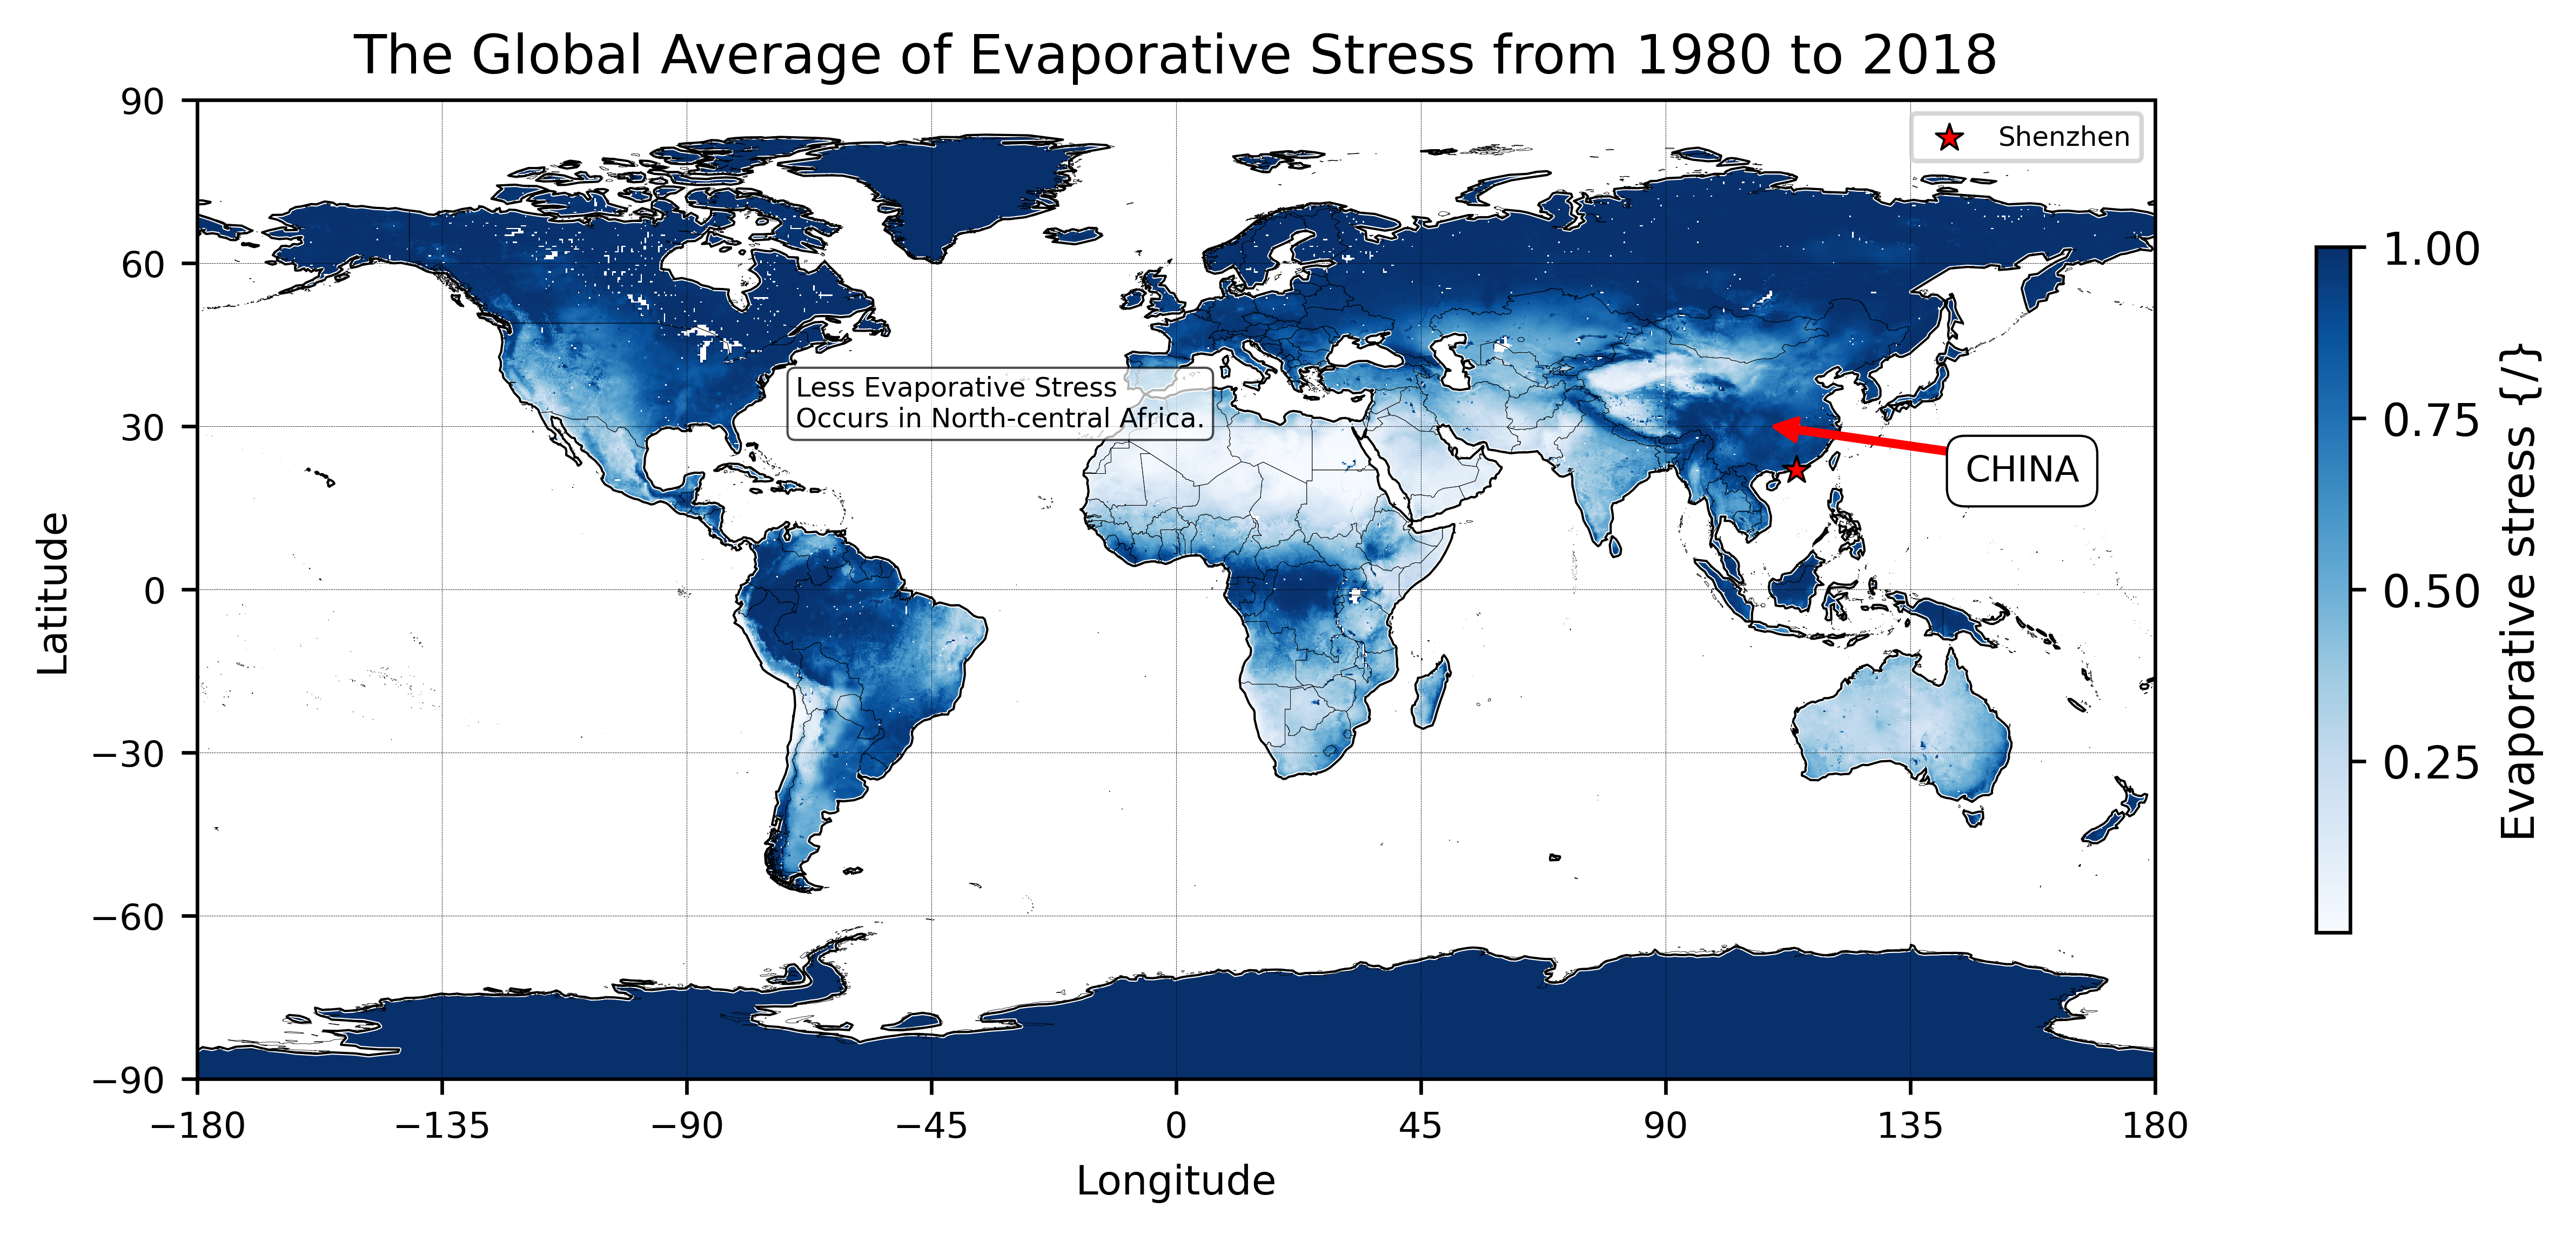

In [3]:
#读取文件
ds = xr.open_dataset("S_1980_2018_GLEAM_v3.3a_YR.nc",engine="netcdf4")

#画图
fig = plt.figure(figsize=(16,4),dpi=600)
ax = plt.axes(projection=ccrs.PlateCarree())         

# 运用NaturalEarthFeature构造函数产生Feature对象
ax.add_feature(cfeature.NaturalEarthFeature(category='cultural',
                                           name='admin_0_countries',
                                           scale='10m',
                                           facecolor='none',
                                           edgecolor='black',
                                           linewidth=0.1, 
                                           zorder=2))#叠加顺序

#将数据绘制成图
#并添加colorbar
ds.S.mean(dim='time').transpose().plot(cmap='Blues',
                                       cbar_kwargs={'shrink':0.7,#缩放参数
                                      'pad':0.04,#色条与子图的间距
                                      'ticks':list(np.linspace(0, 1, 5)),#自定义各段的记号
                                      'orientation':'vertical',#垂直放置
                                      'label':'Evaporative stress {/}'})

# x 标签和标记
ax.tick_params(labelsize=8)
ax.set_xticks(np.linspace(-180, 180, 9))
ax.set_xlabel('Longitude',fontsize=9)

# y 标签和标记
ax.set_yticks(np.linspace(-90, 90, 7))
ax.set_ylabel('Latitude',fontsize=9)

#标题
ax.set_title("The Global Average of Evaporative Stress from 1980 to 2018",fontsize=12)

#网格参数
ax.gridlines(xlocs=mticker.FixedLocator(np.arange(-180, 180, 45)),
             ylocs=mticker.FixedLocator(np.arange(-90,90,30)),
             linestyle='--',linewidth=0.1, color='k')

#legend设定
ax.scatter(114,22,s=40,c='r',marker='*',label='Shenzhen',ec='k', lw=0.5,zorder=3)
ax.legend(loc=1,fontsize=6)

#添加局部features,
ax.add_feature(cfeature.OCEAN, facecolor='w',zorder=1)#海洋
ax.add_feature(cfeature.COASTLINE,linewidth=0.5)#海岸线

#注释的设置
ax.annotate('CHINA',xy=(110,30),xytext=(145,20),fontsize=8,#文字
            arrowprops=dict(width=1,headwidth=5,headlength=5,color='r'),#箭头形状
            bbox=dict(boxstyle='round,pad=0.5', fc='white', ec='black',lw=0.5 ))#背景

#文本框
ax.text(-70,30,'Less Evaporative Stress \nOccurs in North-central Africa.',
         fontsize=6,bbox=dict(boxstyle='round,pad=0.3', fc='white', ec='black',lw=0.5 ,alpha=0.7))

plt.show()

### 2.2

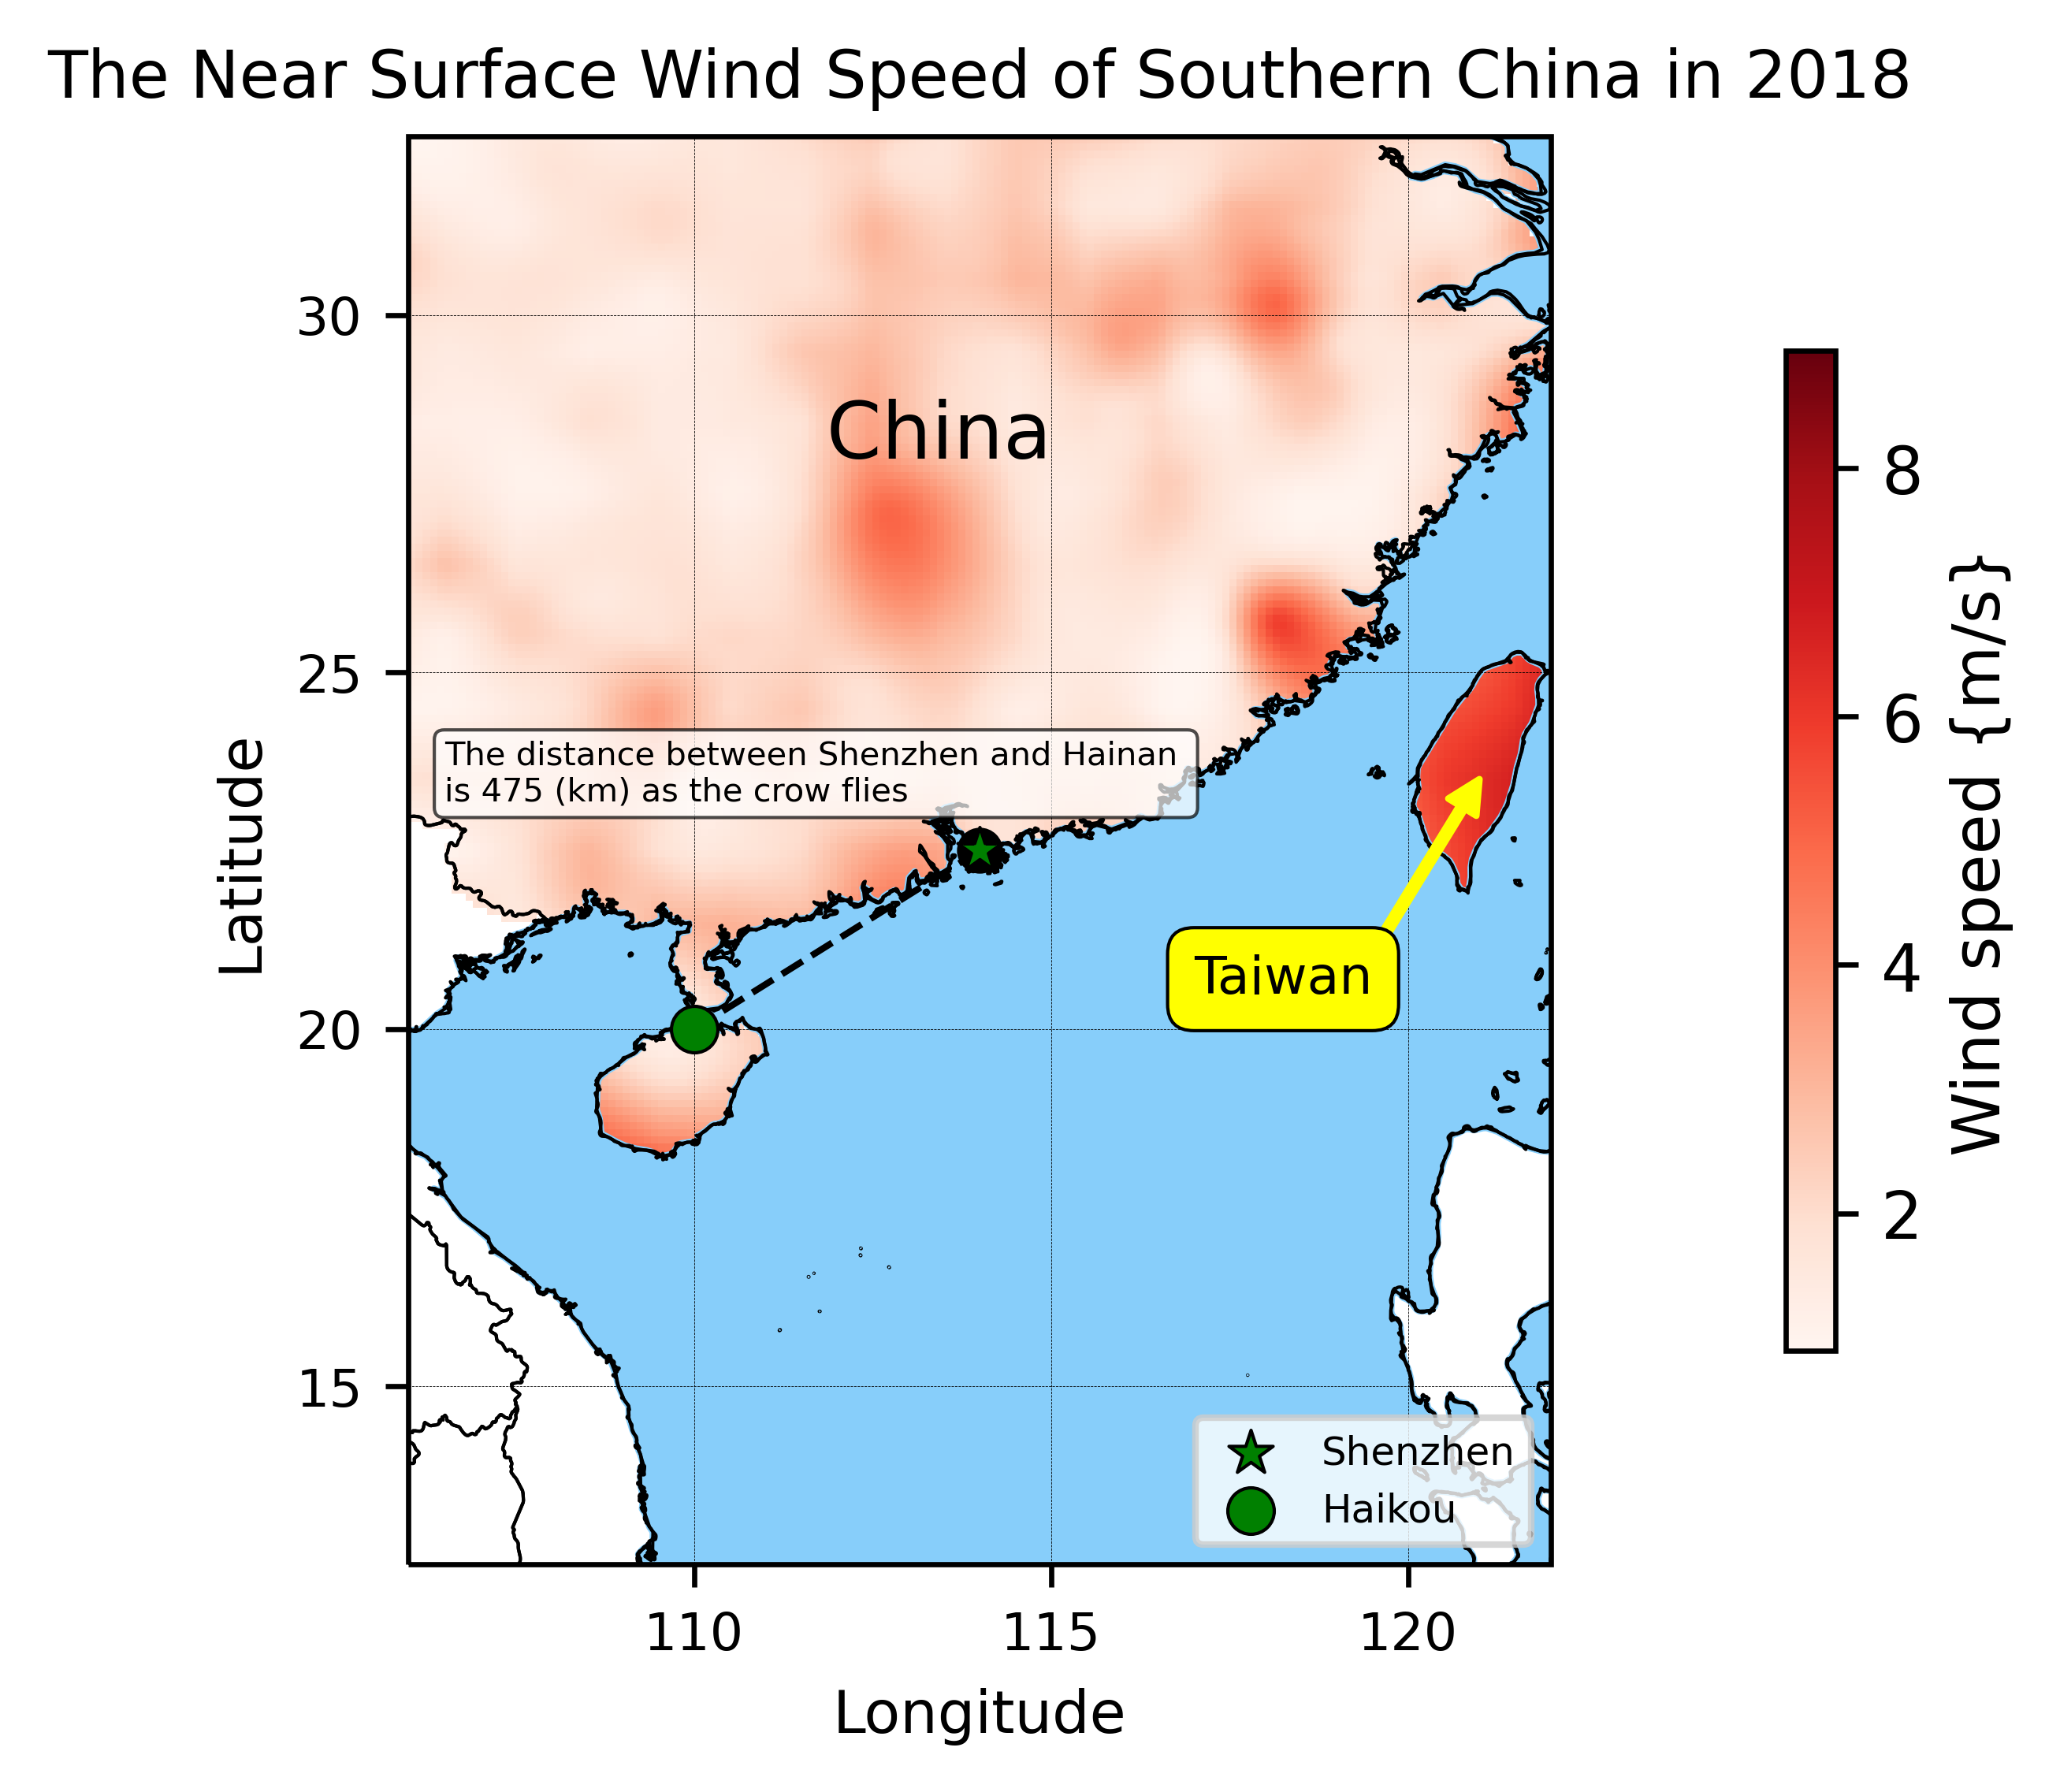

In [4]:
#读取文件
ds_2 = xr.open_dataset("wind_CMFD_V0106_B-01_01dy_010deg_201801-201812.nc",engine="netcdf4")

#画图
plt.figure(figsize=(16,4), dpi=600)
ax = plt.axes(projection=ccrs.PlateCarree())

# 运用NaturalEarthFeature构造函数产生Feature对象
ax.add_feature(cfeature.NaturalEarthFeature(category='cultural',
                                           name='admin_0_countries',
                                           scale='10m',
                                           facecolor='none',
                                           edgecolor='black',
                                           linewidth=0.5, 
                                           zorder=2))
#将数据绘制成图
#并添加colorbar
ds_2.wind.mean('time').plot(cmap='Reds',
                                      cbar_kwargs={'shrink':0.7,#缩放参数
                                      'pad':0.04,#色条与子图的间距
                                      'ticks':list(np.linspace(0, 10, 6)),#自定义各段的记号
                                      'orientation':'vertical',#垂直放置
                                      'label':'Wind speed {m/s}'})
# x 标签和标记
ax.tick_params(labelsize=8)
ax.set_xticks(np.linspace(-180, 180, 73))
ax.set_xlabel('Longitude',fontsize=9)

# y 标签和标记
ax.set_yticks(np.linspace(-90, 90, 37))
ax.set_ylabel('Latitude',fontsize=9)

#标题
ax.set_title("The Near Surface Wind Speed of Southern China in 2018",fontsize=10)

#网格参数
ax.gridlines(xlocs=mticker.FixedLocator(np.arange(-180, 180,5)),
             ylocs=mticker.FixedLocator(np.arange(-90,90,5)),
             linestyle='--',linewidth=0.1, color='k')

#legend设定
shenzhen_lon, shenzhen_lat = 114, 22.5 # Shenzhen
hainan_lon, hainan_lat = 110, 20 #Hainan
ax.scatter(shenzhen_lon, shenzhen_lat,s=50,c='g',marker='*',label='Shenzhen',ec='k', lw=0.5,zorder=3)
ax.scatter(hainan_lon, hainan_lat,s=50,c='g',marker='o',label='Haikou',ec='k', lw=0.5,zorder=3)
ax.legend(loc='lower right',fontsize=6)

#设置中国深圳区域
extent = [shenzhen_lon-8, shenzhen_lon+8, shenzhen_lat-10, shenzhen_lat+10]
ax.set_extent(extent)

#添加局部features
ax.add_feature(cfeature.OCEAN, facecolor='lightskyblue',zorder=1)#海洋
ax.add_feature(cfeature.COASTLINE,linewidth=0.5)#海岸线

#注释的设置
ax.annotate('Taiwan',xy=(121,23.5),xytext=(117,20.5),fontsize=8,#文字
            arrowprops=dict(width=1,headwidth=5,headlength=5,color='Yellow'),#箭头形状
            bbox=dict(boxstyle='round,pad=0.5', fc='Yellow',lw=0.5 ))#背景

#文本框
lons = [shenzhen_lon, hainan_lon]
lats = [shenzhen_lat, hainan_lat]
ax.plot(lons, lats, 'ko--',lw=1, transform=ccrs.PlateCarree())
ax.text(106.5,23.2,'The distance between Shenzhen and Hainan \nis 475 (km) as the crow flies',
         fontsize=5,bbox=dict(boxstyle='round,pad=0.3', fc='white', ec='black',lw=0.5 ,alpha=0.7))
ax.text(111.5,28,' China',fontsize=12)

plt.show()
